# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [12]:
import os
import wget
if not os.path.exists("lut.py") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py')
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

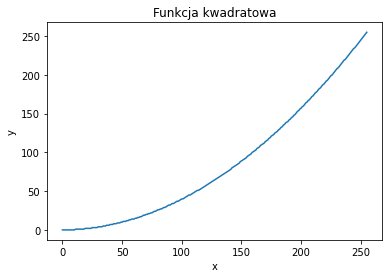

In [13]:
plt.plot(lut.kwadratowa)
plt.title('Funkcja kwadratowa')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

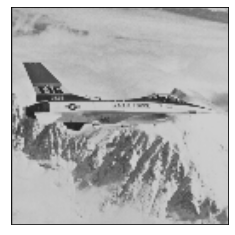

In [14]:
if not os.path.exists("jet.bmp"):
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp')
I = cv2.imread("jet.bmp")
plt.imshow(I)
plt.xticks([])
plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

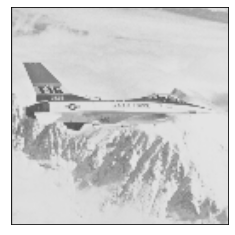

In [15]:
I_lut = cv2.LUT(I, lut.pierwiastkowa)
plt.imshow(I_lut)
plt.xticks([])
plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [41]:
def LUT(img, table):
    img_lut = cv2.LUT(img, table)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 5))
    ax1.plot(table)
    ax1.set_title('wykres przekodowania')
    ax1.set_aspect('equal')
    ax2.imshow(img)
    ax2.set_title('obraz oryginalny')
    ax3.imshow(img_lut)
    ax3.set_title('obraz przekształcony')


Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

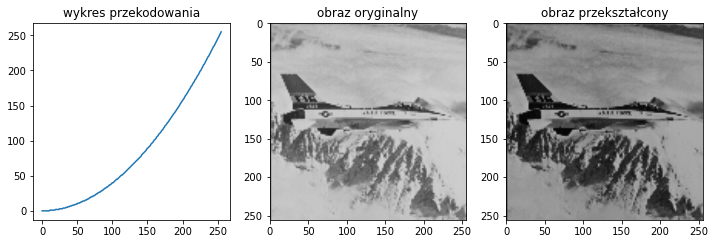

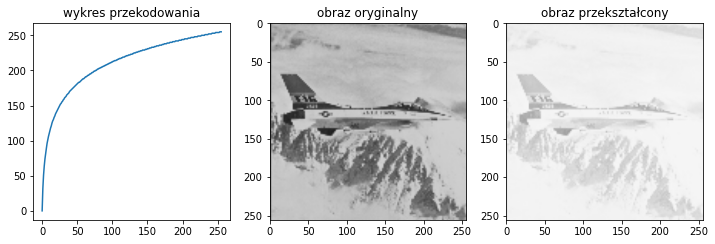

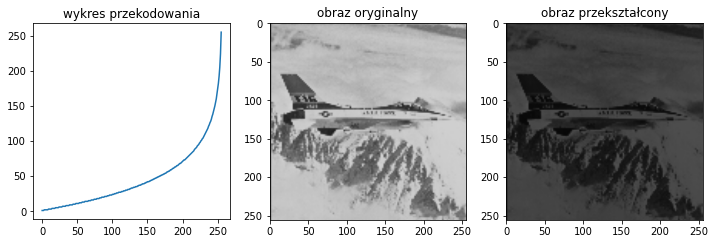

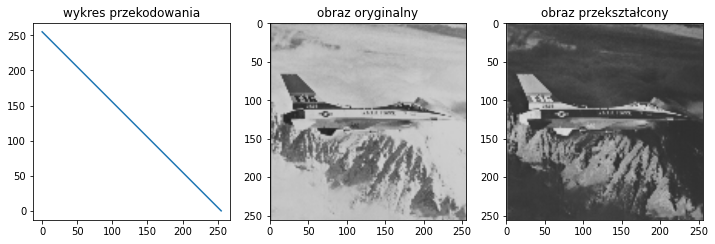

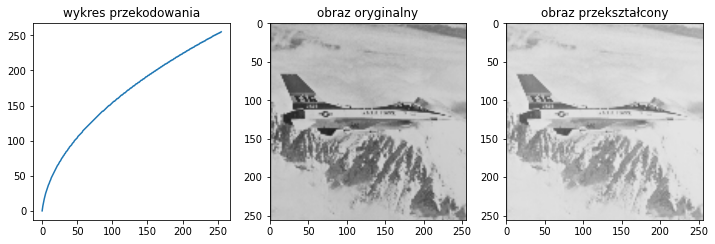

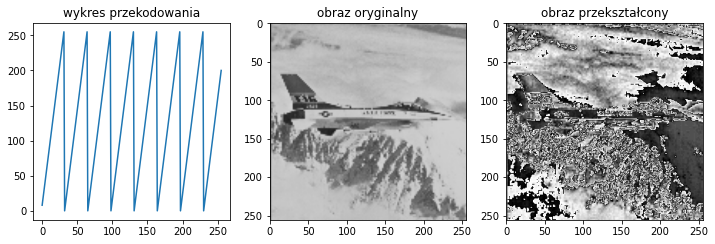

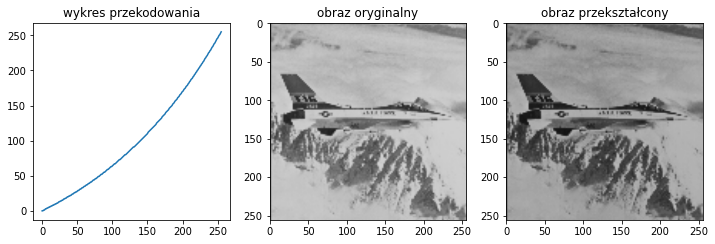

In [42]:
tables = [lut.kwadratowa, lut.log, lut.odwlog, lut.odwrotna, lut.pierwiastkowa, lut.pila, lut.wykladnicza]
for t in tables:
    LUT(I, t)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

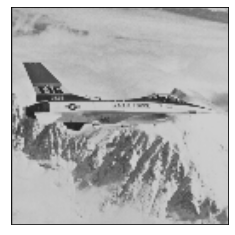

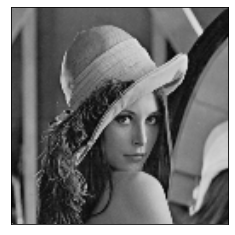

In [18]:
if not os.path.exists("jet.bmp"):
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp')
jet = cv2.imread("jet.bmp")
plt.imshow(jet)
plt.xticks([])
plt.yticks([])
plt.show()

if not os.path.exists("lena.bmp"):
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp')
lena = cv2.imread("lena.bmp")
plt.imshow(lena)
plt.xticks([])
plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

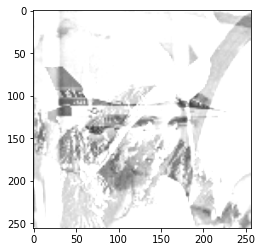

In [19]:
I_add = cv2.add(jet, lena)
plt.imshow(I_add)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

Obraz wynikowy jest zbyt jasny, nie widać wielu szczegółów. Dzieje się tak, ponieważ nie uwzględniliśmy zakresu obrazu, a więc niektóre wartości mogą wykraczać poza zakres i przez zostać pominietę (białe plamy).

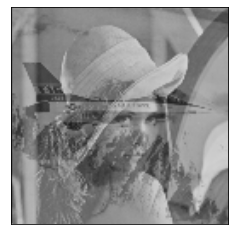

In [20]:
I_add = cv2.add(jet.astype('uint16')/2, lena.astype('uint16')/2)
I_add_uint8 = I_add.astype('uint8')
plt.imshow(I_add_uint8)
plt.xticks([])
plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

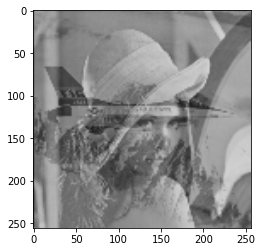

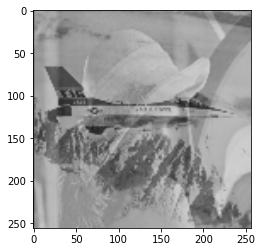

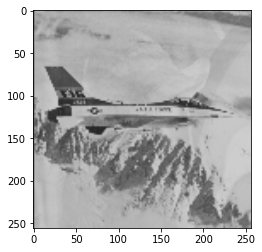

In [21]:
I1 = cv2.addWeighted(lena, 0.5, jet, 0.5, 0)
plt.imshow(I1)
plt.show()
I2 = cv2.addWeighted(lena, 0.3, jet, 0.7, 0)
plt.imshow(I2)
plt.show()
I3 = cv2.addWeighted(lena, 0.1, jet, 0.9, 0)
plt.imshow(I3)
plt.show()

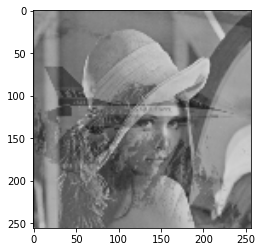

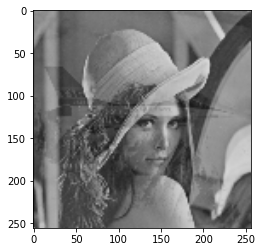

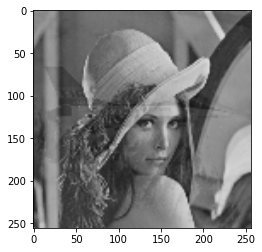

In [22]:
I4 = cv2.addWeighted(lena, 0.6, jet, 0.4, 0)
plt.imshow(I4)
plt.show()
I6 = cv2.addWeighted(lena, 0.75, jet, 0.25, 0)
plt.imshow(I6)
plt.show()
I5 = cv2.addWeighted(lena, 0.8, jet, 0.2, 0)
plt.imshow(I5)
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

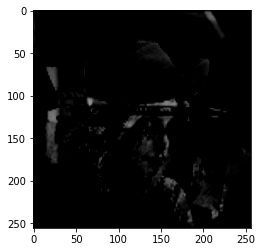

In [23]:
I_sub = cv2.subtract(lena, jet)
plt.imshow(I_sub)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

Obraz wynikowy jest bardzo przyciemniony, niewiele na nim widać. Dzieje się tak, ponieważ nie uwzględniliśmy, że w wyniku odejmowania wartości piksela większego od mniejszego uzyskamy liczbę ujemną, a więc taki element na obrazie będzie czarny (o zerowej wartości w skali szarości)

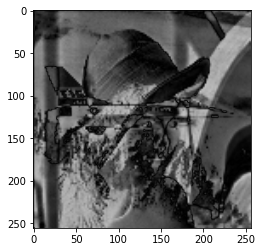

In [24]:
I_sub = cv2.subtract(lena.astype('int16'), jet.astype('int16'))
I_sub_abs = np.abs(I_sub)
plt.imshow(I_sub_abs)
plt.xticks(), plt.yticks()
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

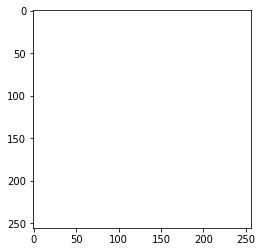

In [35]:
I_mn = cv2.multiply(lena, jet)
plt.imshow(I_mn)
plt.show()

Wynik ten nie zawiera istotnych informacji, ponieważ nie jest ograniczony zakres pikseli na obrazie, a więc znaczna większość iloczynów będzie ten zakres przekraczać. W konsekwencji te elementy bedą tworzyły białe plamy.

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

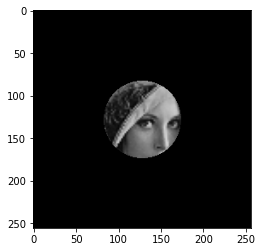

In [31]:
if not os.path.exists("kolo.bmp"):
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp')
maska = cv2.imread('kolo.bmp')
maska = maska.astype('bool').astype('uint8')
I_maska = cv2.multiply(lena, maska)
plt.imshow(I_maska)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

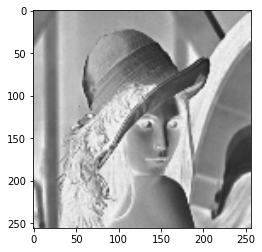

In [27]:
neg1 = cv2.bitwise_not(lena)
plt.imshow(neg1)
plt.show()

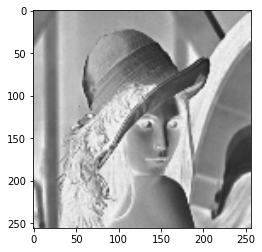

In [28]:
neg2 = cv2.LUT(lena, lut.odwrotna)
plt.imshow(neg2)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

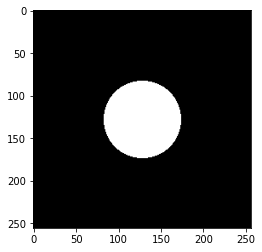

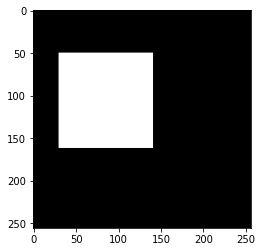

In [29]:
kolo = cv2.imread('kolo.bmp')
if not os.path.exists("kwadrat.bmp"):
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp')
kwadrat = cv2.imread('kwadrat.bmp')
plt.imshow(kolo)
plt.show()
plt.imshow(kwadrat)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

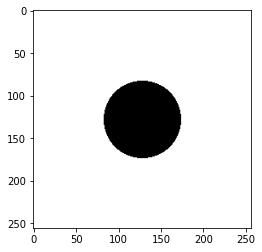

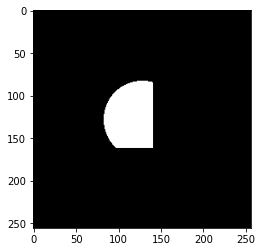

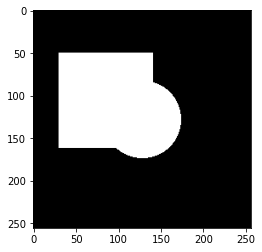

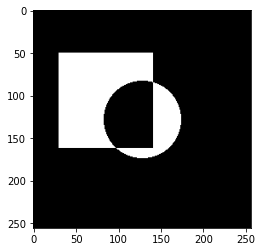

In [30]:
kolo_not = ~kolo
plt.imshow(kolo_not)
plt.show()
kolo_and_kwadr = kolo&kwadrat
plt.imshow(kolo_and_kwadr)
plt.show()
kolo_or_kwadr = kolo|kwadrat
plt.imshow(kolo_or_kwadr)
plt.show()
kolo_xor_kwadr = kolo^kwadrat
plt.imshow(kolo_xor_kwadr)
plt.show()